In [9]:
import matplotlib.pyplot as plt
import numpy as np
import SimpleITK as sitk
import os as os

In [11]:
def check_path(path):
    count=0
    for files in os.listdir(path):
        image_path = os.path.join(path,files)
        #print(image_path)
        count+=1
        #segmented_path=os.path.join(image_path,"NRRD")
    return count - 1

In [12]:
# (patient count* 15) check_path function will return total patient count 
folder_path = os.getcwd() + "/Incoming_Annotations"

length = check_path(folder_path)
inputs = np.zeros((length*15,256,512, 1))
outputs = np.zeros((length*15,256,512 , 9))

In [13]:
def nrrd_to_np(path):
    global ann_count
    try:
        seg = sitk.GetArrayFromImage(path)
        for p in range(15):
            current_seg = seg[p]
            new_seg = np.zeros([256,512,9])
            for y,a in enumerate(current_seg):
                for x,b in enumerate(a):
                    if b>0:
                        new_seg[y][x][b-1]=1
            threshold, upper, lower = 0.5, 1, 0
            new_seg[new_seg>threshold] = upper
            new_seg[new_seg<=threshold] = lower

            #new_seg has size of 256x512x9 
            outputs[ann_count]=new_seg
            ann_count+=1
    except Exception as e:
        print(e)

In [14]:
def dcm_to_np(path):
    global dic_count
    try:
        slice_filenames = sitk.ImageSeriesReader_GetGDCMSeriesFileNames(path)
        image = sitk.ReadImage(slice_filenames)
        for x in range(15):
            current_slice = image[:, :, x]
            current_array = sitk.GetArrayFromImage(current_slice)
            inputs[dic_count]=current_array[:,:,np.newaxis]
            dic_count+=1
    except:
        print("ERROR: " + path)

In [15]:
dic_count = 0
ann_count = 0
#set path 


for folders in sorted(os.listdir(folder_path)):
    image_path = os.path.join(folder_path, folders)
    dcm_to_np(image_path)
    print("current dic_count: " + str(dic_count))
for files in sorted(os.listdir(folder_path)):
    try:
        image_path = os.path.join(folder_path,files)
        segmented_path = os.path.join(image_path, "NRRD","")
        for entry in os.listdir(segmented_path):
            segmented_path += entry
            segmentation = sitk.ReadImage(segmented_path)
            nrrd_to_np(segmentation)
            print("current ann_count: " + str(ann_count))
    except:
        print("fuck you")

ERROR: /home/ubuntu/Incoming_Annotations/.ipynb_checkpoints
current dic_count: 0
current dic_count: 15
current dic_count: 30
current dic_count: 45
current dic_count: 60
current dic_count: 75
current dic_count: 90
current dic_count: 105
current dic_count: 120
current dic_count: 135
current dic_count: 150
current dic_count: 165
current dic_count: 180
current dic_count: 195
current dic_count: 210
current dic_count: 225
current dic_count: 240
current dic_count: 255
current dic_count: 270
current dic_count: 285
current dic_count: 300
current dic_count: 315
current dic_count: 330
current dic_count: 345
current dic_count: 360
current dic_count: 375
current dic_count: 390
current dic_count: 405
current dic_count: 420
current dic_count: 435
current dic_count: 450
current dic_count: 465
current dic_count: 480
current dic_count: 495
current dic_count: 510
current dic_count: 525
current dic_count: 540
current dic_count: 555
current dic_count: 570
current dic_count: 585
current dic_count: 600
curre

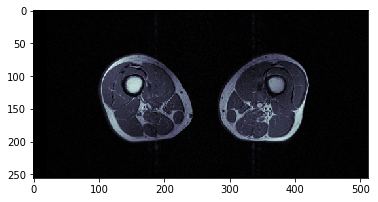

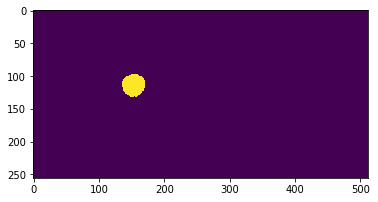

In [16]:
plt.imshow(inputs[0].reshape(256, 512), cmap=plt.cm.bone)
plt.show()
plt.imshow(outputs[0][:, :, 8])
plt.show()

In [21]:
import numpy as np
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as keras

def get_small_unet(n_filters = 16, bn = False, dilation_rate = 1):
    '''Validation Image data generator
        Inputs: 
            n_filters - base convolution filters
            bn - flag to set batch normalization
            dilation_rate - convolution dilation rate
        Output: Unet keras Model
    '''
    #Define input batch shape
    inputs = Input([256, 512, 1])
    print(inputs)
    
    conv1 = Conv2D(n_filters * 1, (3, 3), activation='relu', padding = 'same', dilation_rate = dilation_rate)(inputs)
    if bn:
        conv1 = BatchNormalization()(conv1)
        
    conv1 = Conv2D(n_filters * 1, (3, 3), activation='relu', padding = 'same', dilation_rate = dilation_rate)(conv1)
    if bn:
        conv1 = BatchNormalization()(conv1)
    
    pool1 = MaxPooling2D(pool_size=(2, 2), data_format='channels_last')(conv1)

    conv2 = Conv2D(n_filters * 2, (3, 3), activation='relu', padding = 'same', dilation_rate = dilation_rate)(pool1)
    if bn:
        conv2 = BatchNormalization()(conv2)
        
    conv2 = Conv2D(n_filters * 2, (3, 3), activation='relu', padding = 'same', dilation_rate = dilation_rate)(conv2)
    if bn:
        conv2 = BatchNormalization()(conv2)
    
    pool2 = MaxPooling2D(pool_size=(2, 2), data_format='channels_last')(conv2)

    conv3 = Conv2D(n_filters * 4, (3, 3), activation='relu', padding = 'same', dilation_rate = dilation_rate)(pool2)
    if bn:
        conv3 = BatchNormalization()(conv3)
        
    conv3 = Conv2D(n_filters * 4, (3, 3), activation='relu', padding = 'same', dilation_rate = dilation_rate)(conv3)
    if bn:
        conv3 = BatchNormalization()(conv3)
        
    pool3 = MaxPooling2D(pool_size=(2, 2), data_format='channels_last')(conv3)

    conv4 = Conv2D(n_filters * 8, (3, 3), activation='relu', padding = 'same', dilation_rate = dilation_rate)(pool3)
    if bn:
        conv4 = BatchNormalization()(conv4)
        
    conv4 = Conv2D(n_filters * 8, (3, 3), activation='relu', padding = 'same', dilation_rate = dilation_rate)(conv4)
    if bn:
        conv4 = BatchNormalization()(conv4)
        
    pool4 = MaxPooling2D(pool_size=(2, 2), data_format='channels_last')(conv4)

    conv5 = Conv2D(n_filters * 16, (3, 3), activation='relu', padding = 'same', dilation_rate = dilation_rate)(pool4)
    if bn:
        conv5 = BatchNormalization()(conv5)
        
    conv5 = Conv2D(n_filters * 16, (3, 3), activation='relu', padding = 'same', dilation_rate = dilation_rate)(conv5)
    if bn:
        conv5 = BatchNormalization()(conv5)
        
    up6 = concatenate([UpSampling2D(size=(2, 2))(conv5), conv4], axis=3)
    
    conv6 = Conv2D(n_filters * 8, (3, 3), activation='relu', padding = 'same', dilation_rate = dilation_rate)(up6)
    if bn:
        conv6 = BatchNormalization()(conv6)
        
    conv6 = Conv2D(n_filters * 8, (3, 3), activation='relu', padding = 'same', dilation_rate = dilation_rate)(conv6)
    if bn:
        conv6 = BatchNormalization()(conv6)
        
    up7 = concatenate([UpSampling2D(size=(2, 2))(conv6), conv3], axis=3)
    
    conv7 = Conv2D(n_filters * 4, (3, 3), activation='relu', padding = 'same', dilation_rate = dilation_rate)(up7)
    if bn:
        conv7 = BatchNormalization()(conv7)
        
    conv7 = Conv2D(n_filters * 4, (3, 3), activation='relu', padding = 'same', dilation_rate = dilation_rate)(conv7)
    if bn:
        conv7 = BatchNormalization()(conv7)
        
    up8 = concatenate([UpSampling2D(size=(2, 2))(conv7), conv2], axis=3)
    
    conv8 = Conv2D(n_filters * 2, (3, 3), activation='relu', padding = 'same', dilation_rate = dilation_rate)(up8)
    if bn:
        conv8 = BatchNormalization()(conv8)
        
    conv8 = Conv2D(n_filters * 2, (3, 3), activation='relu', padding = 'same', dilation_rate = dilation_rate)(conv8)
    if bn:
        conv8 = BatchNormalization()(conv8)
        
    up9 = concatenate([UpSampling2D(size=(2, 2))(conv8), conv1], axis=3)
    
    conv9 = Conv2D(n_filters * 1, (3, 3), activation='relu', padding = 'same', dilation_rate = dilation_rate)(up9)
    if bn:
        conv9 = BatchNormalization()(conv9)
        
    conv9 = Conv2D(n_filters * 1, (3, 3), activation='relu', padding = 'same', dilation_rate = dilation_rate)(conv9)
    if bn:
        conv9 = BatchNormalization()(conv9)
        
    conv10 = Conv2D(32, (1, 1), activation='softmax', padding = 'same', dilation_rate = dilation_rate)(conv9)

    model = Model(inputs=inputs, outputs=conv10)

    
    return model

In [22]:
model = get_small_unet(n_filters = 32)
model.summary()
# model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["binary_crossentropy"])
# results = model.fit(x=inputs, y=outputs, epochs=20, batch_size=8)

Tensor("input_7:0", shape=(?, 256, 512, 1), dtype=float32)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 256, 512, 1)  0                                            
__________________________________________________________________________________________________
conv2d_115 (Conv2D)             (None, 256, 512, 32) 320         input_7[0][0]                    
__________________________________________________________________________________________________
conv2d_116 (Conv2D)             (None, 256, 512, 32) 9248        conv2d_115[0][0]                 
__________________________________________________________________________________________________
max_pooling2d_25 (MaxPooling2D) (None, 128, 256, 32) 0           conv2d_116[0][0]                 
__________________________________________________

In [32]:
#Unet Structure Code Copy and Pasted from Github
import numpy as np
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as keras
def conv2d_block(input_tensor, n_filters, kernel_size=3, batchnorm=True):
    # first layer
    x = Conv2D(filters=n_filters, kernel_size=(kernel_size, kernel_size), kernel_initializer="he_normal",
               padding="same")(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation("relu")(x)
    # second layer
    x = Conv2D(filters=n_filters, kernel_size=(kernel_size, kernel_size), kernel_initializer="he_normal",
               padding="same")(x)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation("relu")(x)
    return x
def get_unet(input_img, n_filters=16, dropout=0.5, batchnorm=True):
    # contracting path
    c1 = conv2d_block(input_img, n_filters=n_filters*1, kernel_size=3, batchnorm=batchnorm)
    p1 = MaxPooling2D((2, 2)) (c1)
    p1 = Dropout(dropout*0.5)(p1)

    c2 = conv2d_block(p1, n_filters=n_filters*2, kernel_size=3, batchnorm=batchnorm)
    p2 = MaxPooling2D((2, 2)) (c2)
    p2 = Dropout(dropout)(p2)

    c3 = conv2d_block(p2, n_filters=n_filters*4, kernel_size=3, batchnorm=batchnorm)
    p3 = MaxPooling2D((2, 2)) (c3)
    p3 = Dropout(dropout)(p3)

    c4 = conv2d_block(p3, n_filters=n_filters*8, kernel_size=3, batchnorm=batchnorm)
    p4 = MaxPooling2D(pool_size=(2, 2)) (c4)
    p4 = Dropout(dropout)(p4)
    
    c5 = conv2d_block(p4, n_filters=n_filters*16, kernel_size=3, batchnorm=batchnorm)
    
    # expansive path
    u6 = Conv2DTranspose(n_filters*8, (3, 3), strides=(2, 2), padding='same') (c5)
    u6 = concatenate([u6, c4])
    u6 = Dropout(dropout)(u6)
    c6 = conv2d_block(u6, n_filters=n_filters*8, kernel_size=3, batchnorm=batchnorm)

    u7 = Conv2DTranspose(n_filters*4, (3, 3), strides=(2, 2), padding='same') (c6)
    u7 = concatenate([u7, c3])
    u7 = Dropout(dropout)(u7)
    c7 = conv2d_block(u7, n_filters=n_filters*4, kernel_size=3, batchnorm=batchnorm)

    u8 = Conv2DTranspose(n_filters*2, (3, 3), strides=(2, 2), padding='same') (c7)
    u8 = concatenate([u8, c2])
    u8 = Dropout(dropout)(u8)
    c8 = conv2d_block(u8, n_filters=n_filters*2, kernel_size=3, batchnorm=batchnorm)

    u9 = Conv2DTranspose(n_filters*1, (3, 3), strides=(2, 2), padding='same') (c8)
    u9 = concatenate([u9, c1], axis=3)
    u9 = Dropout(dropout)(u9)
    c9 = conv2d_block(u9, n_filters=n_filters*1, kernel_size=3, batchnorm=batchnorm)
    
    outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)
    model = Model(inputs=[input_img], outputs=[outputs])
    return model

Using TensorFlow backend.


In [42]:
from sklearn.cross_validation import train_test_split

model = get_unet(Input([256, 512, 1]))
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["binary_crossentropy"])
results = model.fit(x=inputs, y=outputs, epochs=20, batch_size=8)

ValueError: Error when checking target: expected conv2d_57 to have shape (256, 512, 1) but got array with shape (256, 512, 9)